# Prediction Project for Rental Prices in Istanbul

<img src="images/istanbul.jpg">

### Importing Required Packages

In [2242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import scale, normalize



#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

### Importing Data


In [2243]:
df = pd.read_csv("data/emlakjet.csv")

### EDA - Exploratory Data Analysis

In [2244]:
df.head()

,Price,City,District,Neighborhood,Average Price,Listing Number,Listing Update Date,Category,Net Square Meters,Number of Rooms,Floor,Heating Type,Deposit,Number of Bathrooms,Listing Creation Date,Type,Kind,Gross Square Meters,Building Age,Number of Building Floors,Usage Status,Within Site,Price Status,Structure Status,Furnishing Status,Balcony Status,Building Type,Number of WCs,Swap,Bathroom Square Meters,Living Room Square Meters,WC Square Meters,Virtual Tour Available?,Maintenance Fee,Balcony Type,Number of Balconies,Balcony Square Meters
0,25000TL,İstanbul,Bakırköy,Osmaniye Mahallesi,20900.0,15794285.0,30 Ağustos 2024,Kiralık,90 m²,2+1,Yüksek Giriş,Merkezi (Pay Ölçer),25000 TL,1,30 Ağustos 2024,Konut,Daire,100 m²,21 Ve Üzeri,5.0,Boş,Evet,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14000TL,İstanbul,Küçükçekmece,Kanarya Mahallesi,17250.0,15792263.0,29 Ağustos 2024,Kiralık,145 m²,3+1,6.Kat,Kombi Doğalgaz,14000 TL,1,29 Ağustos 2024,Konut,Daire,150 m²,21 Ve Üzeri,7.0,Boş,Hayır,Genel Fiyat,İkinci El,Boş,Var,Betonarme,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15000TL,İstanbul,Sancaktepe,Meclis Mahallesi,14535.0,15789680.0,29 Ağustos 2024,Kiralık,75 m²,2+1,Yüksek Giriş,Kombi Doğalgaz,NaN,1,29 Ağustos 2024,Konut,Daire,85 m²,2,5.0,Boş,Hayır,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23500TL,İstanbul,Sancaktepe,Meclis Mahallesi,23940.0,15789618.0,29 Ağustos 2024,Kiralık,120 m²,3+1,2.Kat,Kombi Doğalgaz,NaN,2,29 Ağustos 2024,Konut,Daire,140 m²,11-15,5.0,Boş,Hayır,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12000TL,İstanbul,Fatih,Seyyid Ömer Mahallesi,14720.0,15789073.0,29 Ağustos 2024,Kiralık,75 m²,2+1,Bodrum Kat,Kombi Doğalgaz,12000 TL,1,29 Ağustos 2024,Konut,Daire,80 m²,21 Ve Üzeri,5.0,Boş,Hayır,Genel Fiyat,İkinci El,Boş,Yok,Betonarme,1,Yok,5 m²,25 m²,5 m²,Evet,100 TL,NaN,NaN,NaN


In [2245]:
df.sample(3)

,Price,City,District,Neighborhood,Average Price,Listing Number,Listing Update Date,Category,Net Square Meters,Number of Rooms,Floor,Heating Type,Deposit,Number of Bathrooms,Listing Creation Date,Type,Kind,Gross Square Meters,Building Age,Number of Building Floors,Usage Status,Within Site,Price Status,Structure Status,Furnishing Status,Balcony Status,Building Type,Number of WCs,Swap,Bathroom Square Meters,Living Room Square Meters,WC Square Meters,Virtual Tour Available?,Maintenance Fee,Balcony Type,Number of Balconies,Balcony Square Meters
228,17000TL,İstanbul,Ümraniye,İnkılap Mahallesi,22500.0,15791858.0,29 Ağustos 2024,Kiralık,90 m²,2+1,Düz Giriş (Zemin),Kombi Doğalgaz,NaN,1,29 Ağustos 2024,Konut,Daire,100 m²,11-15,5.0,Boş,Hayır,Genel Fiyat,NaN,Boş,NaN,NaN,NaN,Yok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,15000TL,İstanbul,Küçükçekmece,Atatürk Mahallesi,11760.0,15772982.0,26 Ağustos 2024,Kiralık,75 m²,2+1,1.Kat,Kombi Doğalgaz,15000 TL,1,26 Ağustos 2024,Konut,Daire,80 m²,21 Ve Üzeri,3.0,Boş,Hayır,Genel Fiyat,NaN,NaN,Var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348,38000TL,İstanbul,Başakşehir,Kayabaşı Mahallesi,31460.0,15761645.0,24 Ağustos 2024,Kiralık,110 m²,3+1,6.Kat,Merkezi (Pay Ölçer),NaN,2,24 Ağustos 2024,Konut,Daire,130 m²,5-10,8.0,Boş,Evet,Genel Fiyat,NaN,Eşyalı,NaN,NaN,NaN,Yok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2246]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      1497 non-null   object 
 1   City                       1497 non-null   object 
 2   District                   1497 non-null   object 
 3   Neighborhood               1497 non-null   object 
 4   Average Price              1492 non-null   float64
 5   Listing Number             1492 non-null   float64
 6   Listing Update Date        1492 non-null   object 
 7   Category                   1497 non-null   object 
 8   Net Square Meters          1497 non-null   object 
 9   Number of Rooms            1492 non-null   object 
 10  Floor                      1460 non-null   object 
 11  Heating Type               1492 non-null   object 
 12  Deposit                    550 non-null    object 
 13  Number of Bathrooms        1492 non-null   objec

In [2247]:
df.describe()

,Average Price,Listing Number,Number of Building Floors
count,1492.000000,1.492000e+03,1492.000000
mean,24477.940349,1.577193e+07,6.588472
std,22270.865751,1.150118e+05,5.579336
min,2532.000000,1.202110e+07,1.000000
25%,14213.750000,1.576710e+07,4.000000
50%,18790.500000,1.577728e+07,5.000000
75%,27900.000000,1.578768e+07,6.000000
max,309140.000000,1.579910e+07,50.000000


In [2248]:
df.shape

(1500, 37)

In [2249]:
df.isnull().sum()

Price                           3
City                            3
District                        3
Neighborhood                    3
Average Price                   8
Listing Number                  8
Listing Update Date             8
Category                        3
Net Square Meters               3
Number of Rooms                 8
Floor                          40
Heating Type                    8
Deposit                       950
Number of Bathrooms             8
Listing Creation Date           8
Type                            8
Kind                            3
Gross Square Meters             8
Building Age                    8
Number of Building Floors       8
Usage Status                    8
Within Site                     8
Price Status                    3
Structure Status             1199
Furnishing Status             646
Balcony Status               1021
Building Type                1228
Number of WCs                1236
Swap                          688
Bathroom Squar

## Handling Missing Values

In [2250]:
# price 
df = df.dropna(subset=["Price"])
# deposit
df = df.fillna({"Deposit":'0 TL'})
# maintenance
df = df.fillna({"Maintenance Fee":'0 TL'})
# Listing Update Date
df = df.dropna(subset=["Listing Update Date"])


In [2251]:
# average price fillna with mean
df['Average Price'] = df['Average Price'].fillna(df['Average Price'].mean())


In [2252]:
df['Structure Status'].value_counts()

Structure Status
İkinci El    258
Sıfır         43
Name: count, dtype: int64

In [2253]:
df['Furnishing Status'].value_counts()

Furnishing Status
Boş       593
Eşyalı    261
Name: count, dtype: int64

In [2254]:
df['Balcony Status'].value_counts()

Balcony Status
Var    391
Yok     84
Name: count, dtype: int64

In [2255]:
df['Structure Status'].fillna('Bilinmiyor', inplace=True)
df['Furnishing Status'].fillna('Bilinmiyor', inplace=True)
df['Balcony Status'].fillna('Bilinmiyor', inplace=True)
df['Floor'].fillna(df['Floor'].mode()[0], inplace=True)

In [2256]:
df = df.dropna(subset=["Floor"])

In [2257]:
columns_to_drop = ['Listing Number','Neighborhood','Listing Update Date','Building Type','Number of WCs', 'Swap', 'Bathroom Square Meters', 'Living Room Square Meters', 
                   'WC Square Meters', 'Virtual Tour Available?', 'Maintenance Fee', 'Balcony Type', 'Number of Balconies','Balcony Square Meters']

In [2258]:
df = df.drop(columns=columns_to_drop, axis=1)

In [2259]:
df.isnull().sum()

Price                        0
City                         0
District                     0
Average Price                0
Category                     0
Net Square Meters            0
Number of Rooms              0
Floor                        0
Heating Type                 0
Deposit                      0
Number of Bathrooms          0
Listing Creation Date        0
Type                         0
Kind                         0
Gross Square Meters          0
Building Age                 0
Number of Building Floors    0
Usage Status                 0
Within Site                  0
Price Status                 0
Structure Status             0
Furnishing Status            0
Balcony Status               0
dtype: int64

## Feature Engineering

In [2260]:
df.sample(3)

,Price,City,District,Average Price,Category,Net Square Meters,Number of Rooms,Floor,Heating Type,Deposit,Number of Bathrooms,Listing Creation Date,Type,Kind,Gross Square Meters,Building Age,Number of Building Floors,Usage Status,Within Site,Price Status,Structure Status,Furnishing Status,Balcony Status
972,18000TL,İstanbul,Çekmeköy,21100.0,Kiralık,90 m²,2+1,Düz Giriş (Zemin),Kombi Doğalgaz,0 TL,2,26 Ağustos 2024,Konut,Daire,100 m²,5-10,5.0,Boş,Hayır,Genel Fiyat,İkinci El,Bilinmiyor,Bilinmiyor
1433,38000TL,İstanbul,Üsküdar,30910.0,Kiralık,95 m²,2+1,3.Kat,Kombi Doğalgaz,0 TL,1,24 Ağustos 2024,Konut,Daire,110 m²,21 Ve Üzeri,4.0,Boş,Hayır,Genel Fiyat,Bilinmiyor,Boş,Bilinmiyor
1320,38000TL,İstanbul,Beşiktaş,21125.0,Kiralık,60 m²,1+1,3.Kat,Kombi Doğalgaz,0 TL,1,24 Ağustos 2024,Konut,Daire,65 m²,0 (Yeni),5.0,Boş,Hayır,Genel Fiyat,Sıfır,Bilinmiyor,Bilinmiyor


In [2261]:
df['Price'] = df['Price'].str.extract('(\d+)').astype(int)

In [2262]:
df['City'].value_counts()

City
İstanbul    1492
Name: count, dtype: int64

In [2263]:
df = df.drop(columns=['City'], axis=1)  # City column is not necessary

In [2264]:
df['Category'].value_counts()

Category
Kiralık    1492
Name: count, dtype: int64

In [2265]:
df = df.drop(columns=['Category'], axis=1)  # Category column is not necessary

In [2266]:
df['Net Square Meters'] = df['Net Square Meters'].str.extract('(\d+)').astype(int)

In [2267]:
df['Gross Square Meters'] = df['Gross Square Meters'].str.extract('(\d+)').astype(int)

In [2268]:
df['Deposit'] = df['Deposit'].str.extract('(\d+)').astype(int)

In [2269]:
df['Number of Rooms'].value_counts()    

Number of Rooms
2+1       717
3+1       357
1+1       264
4+1        43
Stüdyo     21
4+2        16
5+2        13
1 Oda      12
3+2        11
1.5+1       8
2.5+1       7
5+1         5
6+1         4
2+2         3
3.5+1       3
6+2         3
8+2         1
3+0         1
7+2         1
5+3         1
4.5+1       1
Name: count, dtype: int64

In [2270]:
def convert_room_number(room):
    if '+' in room:
        numbers = room.split('+')
        return sum(float(num) for num in numbers)
    elif 'Stüdyo' in room:
        return 1
    elif 'Oda' in room:
        return int(room.split(' ')[0])
    else:
        return 1

df['Number of Rooms'] = df['Number of Rooms'].apply(convert_room_number)

In [2166]:
df['Type'].value_counts()

Type
Konut    1492
Name: count, dtype: int64

In [2167]:
df = df.drop(columns=['Type'], axis=1)  # Type column is not necessary

In [2168]:
df['Floor'].value_counts()

Floor
3.Kat                234
1.Kat                193
2.Kat                192
4.Kat                165
Yüksek Giriş         133
Bahçe Katı           104
5.Kat                101
Düz Giriş (Zemin)     67
6.Kat                 43
Çatı Katı             37
9.Kat                 30
7.Kat                 24
8.Kat                 21
Kot 1 (-1).Kat        20
Çatı Dubleks          16
Bodrum Kat            14
11.Kat                12
10.Kat                11
Kot 2 (-2).Kat         9
17.Kat                 7
Müstakil               7
14.Kat                 6
Kot 3 (-3).Kat         6
16.Kat                 6
15.Kat                 6
13.Kat                 5
12.Kat                 5
18.Kat                 4
28.Kat                 2
Bahçe Dublex           2
Villa Tipi             2
20.Kat                 1
24.Kat                 1
37.Kat                 1
27.Kat                 1
19.Kat                 1
25.Kat                 1
29.Kat                 1
21.Kat                 1
Name: count, dtype:

In [2169]:
def convert_floor(floor):
    if 'Kat' in floor and any(char.isdigit() for char in floor):
        return int(''.join(filter(str.isdigit, floor)))
    elif 'Yüksek Giriş' in floor or 'Düz Giriş (Zemin)' in floor:
        return 0
    elif 'Bahçe Katı' in floor or 'Bodrum Kat' in floor:
        return -1
    elif 'Çatı Katı' in floor or 'Çatı Dubleks' in floor:
        return 0
    elif 'Müstakil' in floor or 'Villa Tipi' in floor:
        return 100
    elif 'Kot' in floor:
        return int(floor.split('(')[-1].split(')')[0])
    else:
        return 0


df['Floor'] = df['Floor'].apply(convert_floor)

In [2170]:
df['Kind'].value_counts()

Kind
Daire           1433
Residence         26
Villa             22
Bina               5
Köşk               3
Müstakil Ev        2
Yalı Dairesi       1
Name: count, dtype: int64

In [2171]:
df['Heating Type'].value_counts()

Heating Type
Kombi Doğalgaz         1161
Merkezi (Pay Ölçer)     167
Merkezi Doğalgaz         78
Doğalgaz Sobalı          35
Yerden Isıtma            23
Sobalı                   11
Isıtma Yok               10
Kombi Fueloil             3
Klimalı                   2
Kat Kaloriferi            1
Fancoil Ünitesi           1
Name: count, dtype: int64

In [2172]:
df['Building Age'].value_counts()


Building Age
21 Ve Üzeri    521
5-10           346
11-15          168
16-20          163
0 (Yeni)       108
4               99
3               31
2               29
1               27
Name: count, dtype: int64

In [2173]:
def convert_building_age(age):
    if age == '0 (Yeni)':
        return 0
    elif age == '21 Ve Üzeri':
        return 25  
    elif '-' in age:
        start, end = age.split('-')
        return (int(start) + int(end)) // 2  
    else:
        return int(age)  


df['Building Age'] = df['Building Age'].apply(convert_building_age)

In [2174]:

df['Listing Creation Date'].value_counts()

Listing Creation Date
27 Ağustos 2024    239
28 Ağustos 2024    234
30 Ağustos 2024    218
26 Ağustos 2024    214
24 Ağustos 2024    202
29 Ağustos 2024    182
25 Ağustos 2024    148
23 Ağustos 2024     38
09 Ağustos 2024      2
06 Ağustos 2024      2
05 Temmuz 2024       1
19 Ekim 2022         1
06 Eylül 2023        1
04 Mart 2024         1
13 Mayıs 2024        1
09 Haziran 2024      1
04 Ağustos 2024      1
08 Temmuz 2024       1
18 Ağustos 2024      1
19 Ağustos 2024      1
20 Ağustos 2024      1
21 Ağustos 2024      1
16 Ağustos 2024      1
Name: count, dtype: int64

In [2175]:
month_mapping = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April',
    'Mayıs': 'May', 'Haziran': 'June', 'Temmuz': 'July', 'Ağustos': 'August',
    'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

def convert_to_english_date(date_str):
    for tr_month, en_month in month_mapping.items():
        date_str = date_str.replace(tr_month, en_month)
    return date_str

df['Listing Creation Date'] = df['Listing Creation Date'].apply(convert_to_english_date)

df['Listing Creation Date'] = pd.to_datetime(df['Listing Creation Date'], format='%d %B %Y', errors='coerce')

df['Days Since Listing'] = (pd.Timestamp.now() - df['Listing Creation Date']).dt.days

df = df.drop(columns=['Listing Creation Date'], axis=1)

In [2176]:
df['Usage Status'].value_counts()

Usage Status
Boş                     1401
Kiracı Oturuyor           57
Mülk Sahibi Oturuyor      34
Name: count, dtype: int64

In [2177]:
df['Within Site'].value_counts()

Within Site
Hayır    1173
Evet      319
Name: count, dtype: int64

In [2178]:
df['Price Status'].value_counts()

Price Status
Genel Fiyat    1467
Birim Fiyat      25
Name: count, dtype: int64

In [2179]:
df['Structure Status'].value_counts()

Structure Status
Bilinmiyor    1191
İkinci El      258
Sıfır           43
Name: count, dtype: int64

In [2180]:
df['Furnishing Status'].value_counts()

Furnishing Status
Bilinmiyor    638
Boş           593
Eşyalı        261
Name: count, dtype: int64

In [2181]:
df['Balcony Status'].value_counts()

Balcony Status
Bilinmiyor    1017
Var            391
Yok             84
Name: count, dtype: int64

In [2182]:
df['Number of Bathrooms'].value_counts()

Number of Bathrooms
1      1137
2       297
3        34
4        12
Yok       7
6+        4
5         1
Name: count, dtype: int64

In [2183]:
df.loc[df['Number of Bathrooms'] == 'Yok', 'Number of Bathrooms'] = '0'

In [2184]:
df['Number of Bathrooms'] = df['Number of Bathrooms'].str.extract('(\d+)').astype(int)

In [2185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      1492 non-null   int64  
 1   District                   1492 non-null   object 
 2   Average Price              1492 non-null   float64
 3   Net Square Meters          1492 non-null   int64  
 4   Number of Rooms            1492 non-null   float64
 5   Floor                      1492 non-null   int64  
 6   Heating Type               1492 non-null   object 
 7   Deposit                    1492 non-null   int64  
 8   Number of Bathrooms        1492 non-null   int64  
 9   Kind                       1492 non-null   object 
 10  Gross Square Meters        1492 non-null   int64  
 11  Building Age               1492 non-null   int64  
 12  Number of Building Floors  1492 non-null   float64
 13  Usage Status               1492 non-null   object 
 1

In [2186]:
df['SpaceDifference'] = df['Gross Square Meters'] - df['Net Square Meters']

In [2187]:
df.sample(10)

,Price,District,Average Price,Net Square Meters,Number of Rooms,Floor,Heating Type,Deposit,Number of Bathrooms,Kind,Gross Square Meters,Building Age,Number of Building Floors,Usage Status,Within Site,Price Status,Structure Status,Furnishing Status,Balcony Status,Days Since Listing,SpaceDifference
1020,16000,Arnavutköy,15300.0,90,3.0,2,Kombi Doğalgaz,16000,1,Daire,100,3,4.0,Boş,Evet,Genel Fiyat,İkinci El,Boş,Var,4,10
1350,25000,Sarıyer,28500.0,90,3.0,1,Kombi Doğalgaz,25000,1,Daire,100,18,2.0,Boş,Hayır,Genel Fiyat,İkinci El,Bilinmiyor,Yok,6,10
479,30000,Sancaktepe,39840.0,180,5.0,3,Kombi Doğalgaz,0,2,Daire,240,7,3.0,Boş,Hayır,Genel Fiyat,Bilinmiyor,Bilinmiyor,Bilinmiyor,2,60
831,16500,Güngören,12240.0,65,2.0,-1,Kombi Doğalgaz,16500,1,Daire,80,3,5.0,Boş,Hayır,Genel Fiyat,İkinci El,Boş,Yok,1,15
270,10000,Esenyurt,10500.0,80,3.0,-1,Kombi Doğalgaz,10000,1,Daire,100,7,5.0,Boş,Hayır,Genel Fiyat,Bilinmiyor,Boş,Yok,1,20
1186,19500,Şişli,29875.0,110,3.0,1,Kombi Doğalgaz,0,1,Daire,125,25,5.0,Boş,Hayır,Genel Fiyat,Bilinmiyor,Boş,Bilinmiyor,5,15
458,18000,Bahçelievler,13345.0,80,3.5,2,Kombi Doğalgaz,36000,1,Daire,85,25,4.0,Kiracı Oturuyor,Hayır,Genel Fiyat,Bilinmiyor,Bilinmiyor,Bilinmiyor,2,5
812,22000,Büyükçekmece,16055.0,90,3.0,3,Kombi Doğalgaz,22000,1,Daire,95,0,4.0,Boş,Hayır,Genel Fiyat,Sıfır,Boş,Var,1,5
891,17000,Pendik,18480.0,110,4.0,3,Kombi Doğalgaz,0,1,Daire,120,13,4.0,Boş,Hayır,Genel Fiyat,Bilinmiyor,Boş,Bilinmiyor,3,10
1314,11000,Fatih,9405.0,50,2.0,-1,Kombi Doğalgaz,0,1,Daire,55,25,5.0,Boş,Hayır,Genel Fiyat,Bilinmiyor,Boş,Bilinmiyor,6,5


## Removing Outliers

In [2188]:
outliers = df.quantile(q = 0.97, numeric_only=True)

df = df[df['Price'] < outliers['Price']]
df = df[df['Average Price'] < outliers['Average Price']]
df = df[df['Gross Square Meters'] < outliers['Gross Square Meters']]
df = df[df['Net Square Meters'] < outliers['Net Square Meters']]

## Data Visualization  

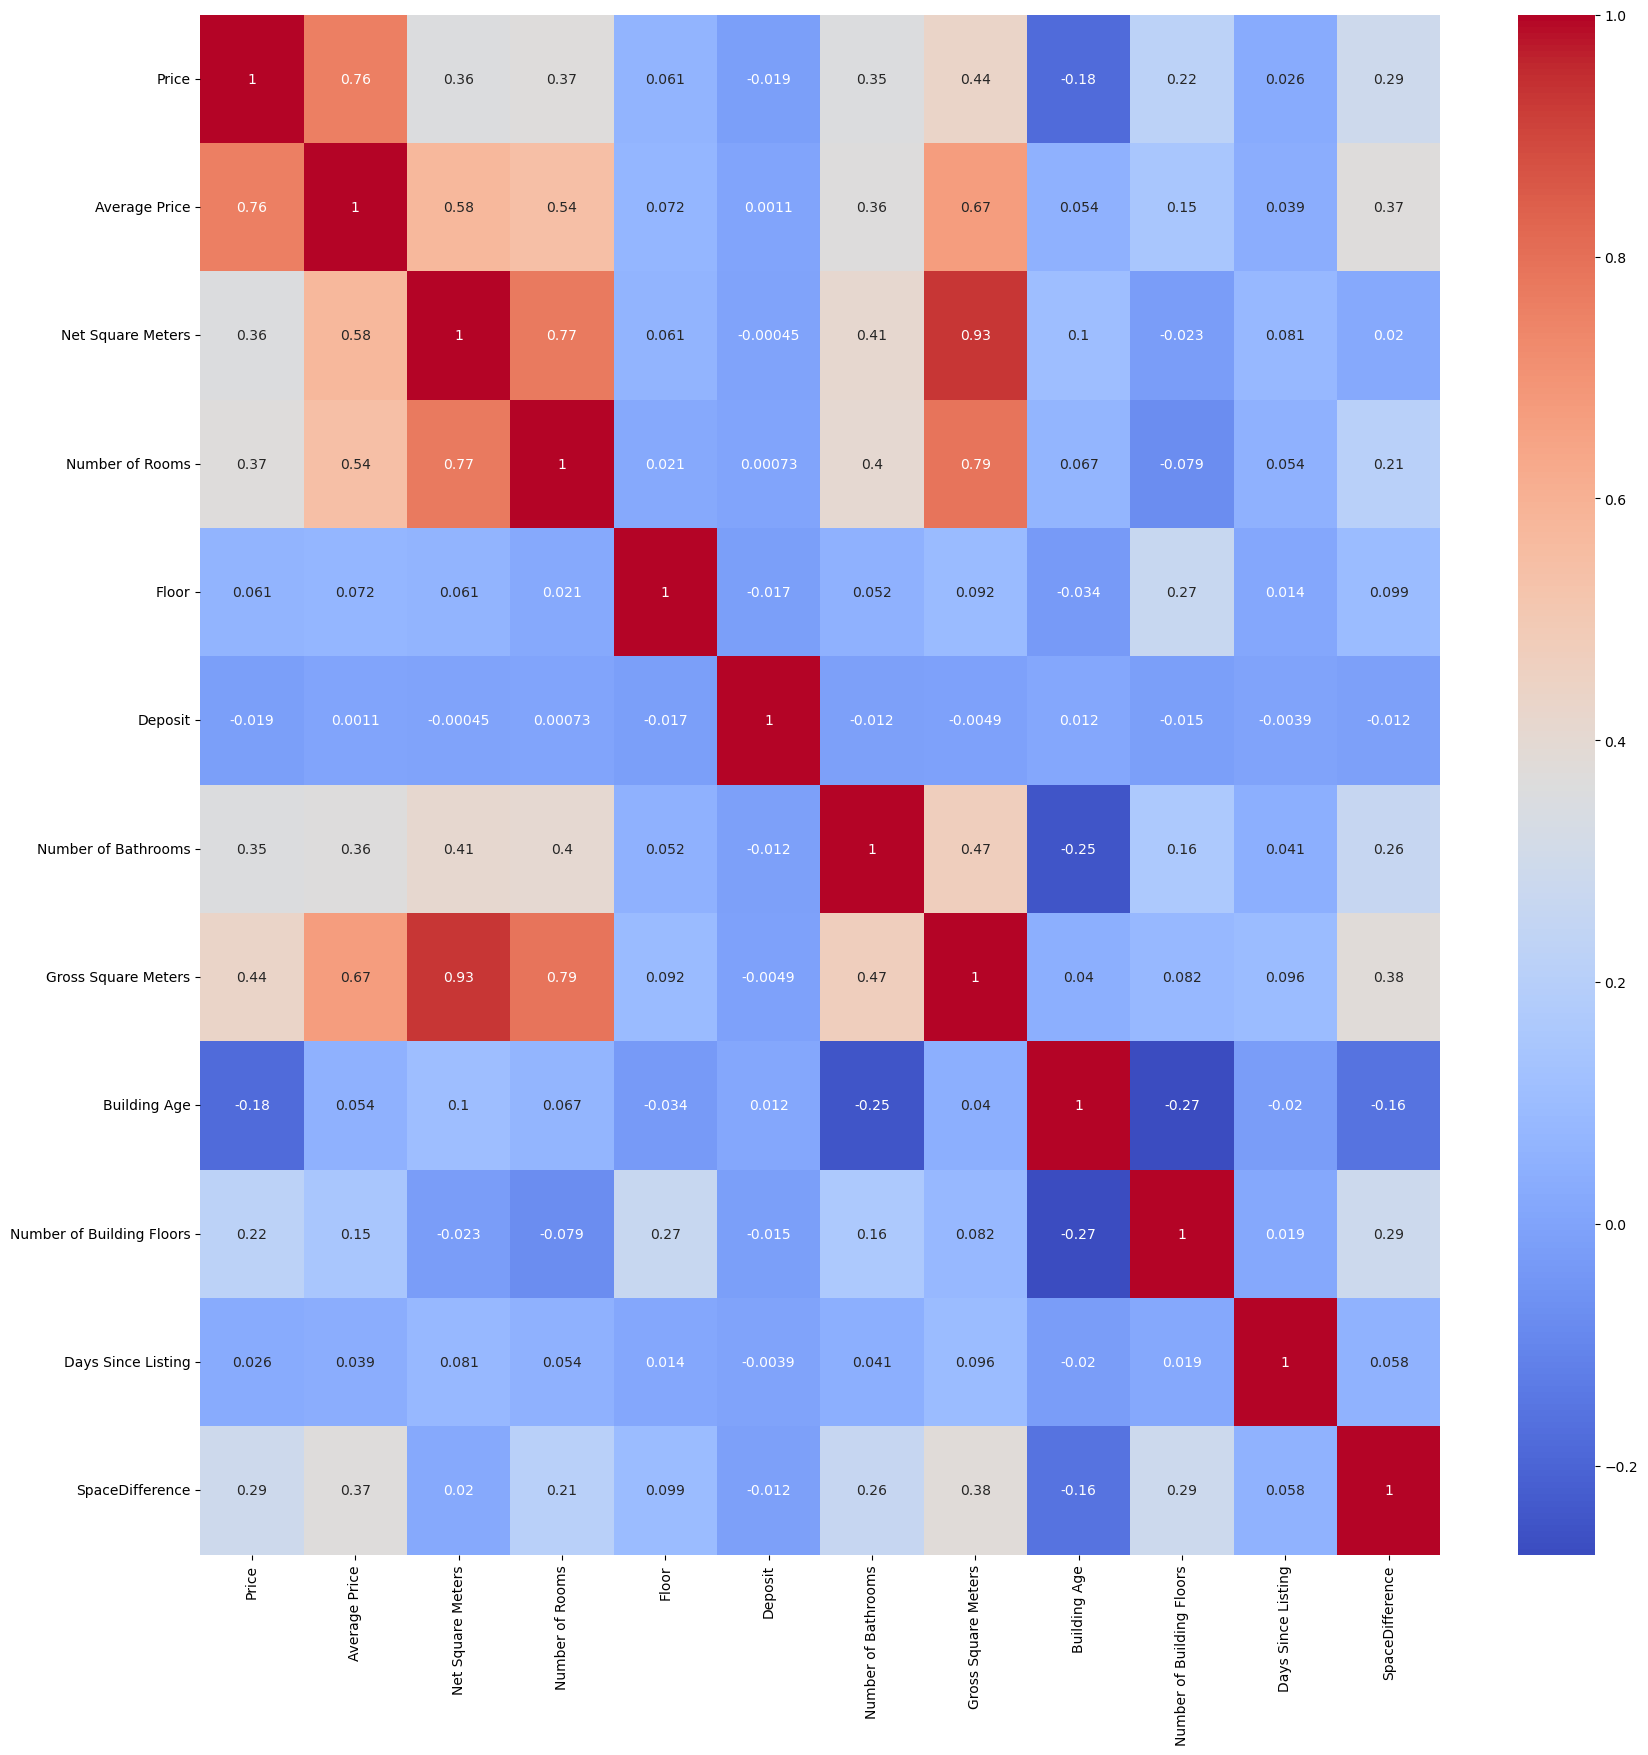

In [2189]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

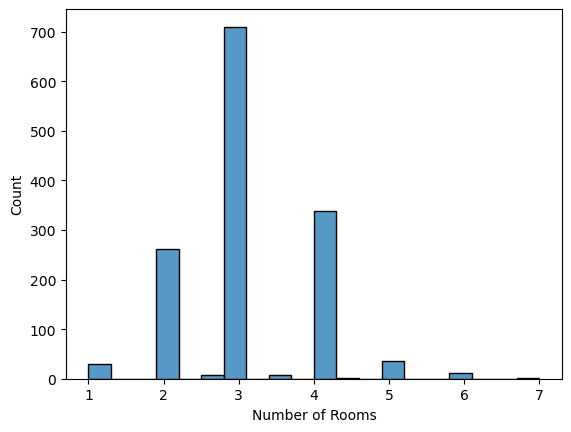

In [2190]:
sns.histplot(df['Number of Rooms'], bins=20);

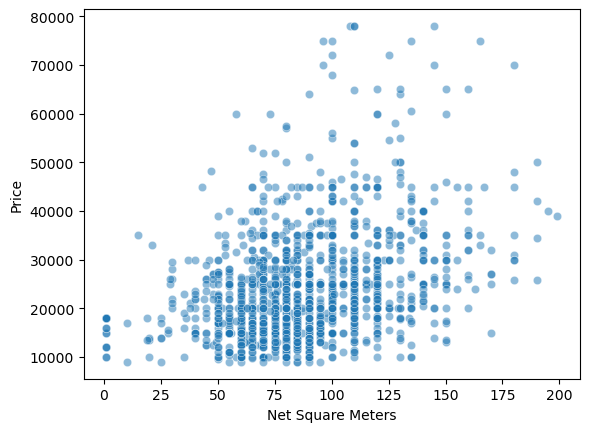

In [2191]:
sns.scatterplot(x='Net Square Meters', y='Price', data=df, alpha=0.5);

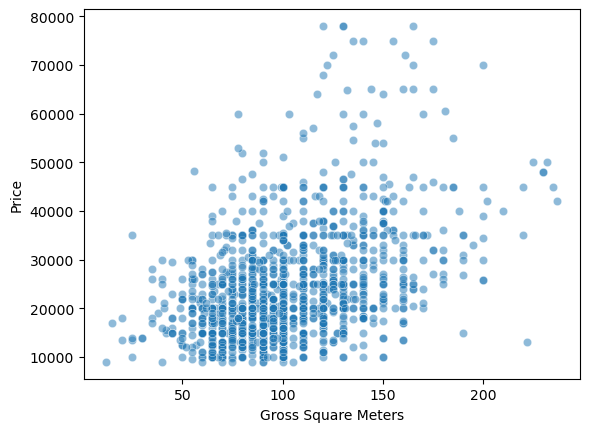

In [2192]:
sns.scatterplot(x='Gross Square Meters', y='Price', data=df, alpha=0.5);

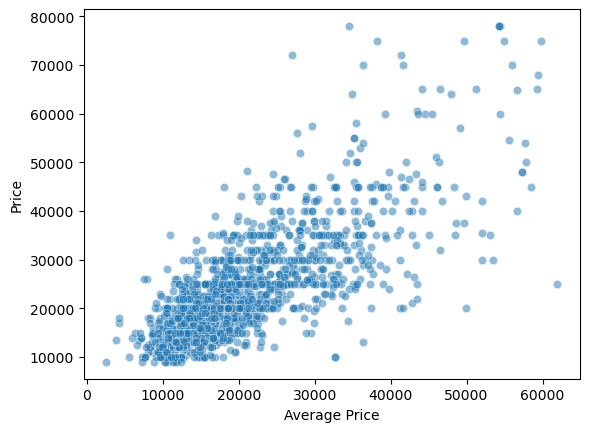

In [2193]:
sns.scatterplot(x='Average Price', y='Price', data=df, alpha=0.5);


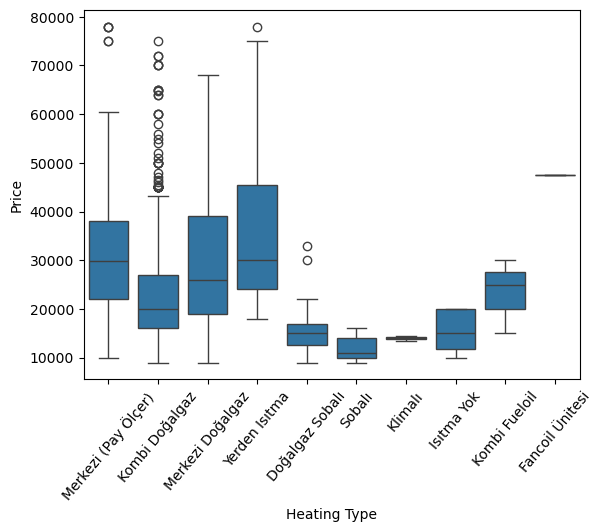

In [2194]:
sns.boxplot(x='Heating Type', y='Price', data=df)
plt.xticks(rotation=50);

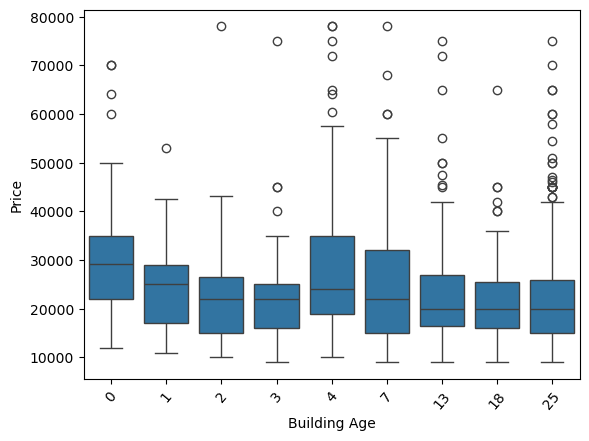

In [2195]:
sns.boxplot(x='Building Age', y='Price', data=df)
plt.xticks(rotation=50);

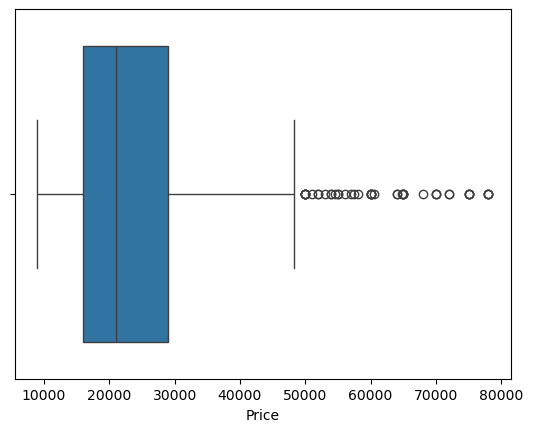

In [2196]:
sns.boxplot(x='Price', data=df);

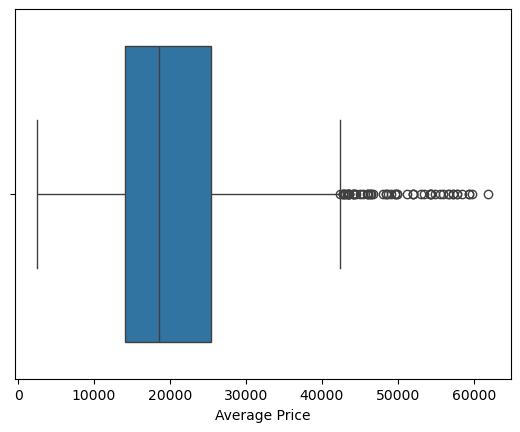

In [2197]:
sns.boxplot(x='Average Price', data=df);

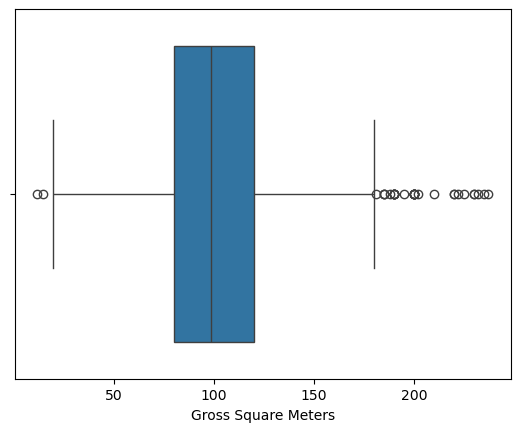

In [2198]:
sns.boxplot(x='Gross Square Meters', data=df);

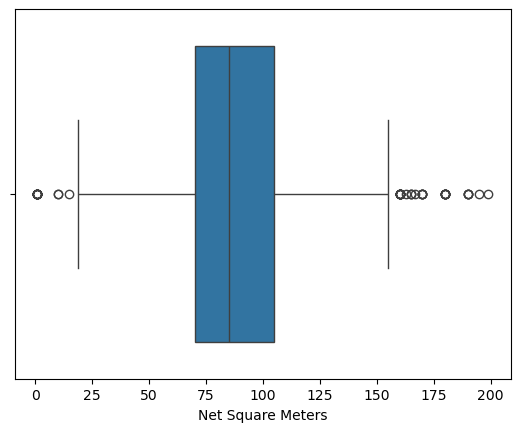

In [2199]:
sns.boxplot(x='Net Square Meters', data=df);

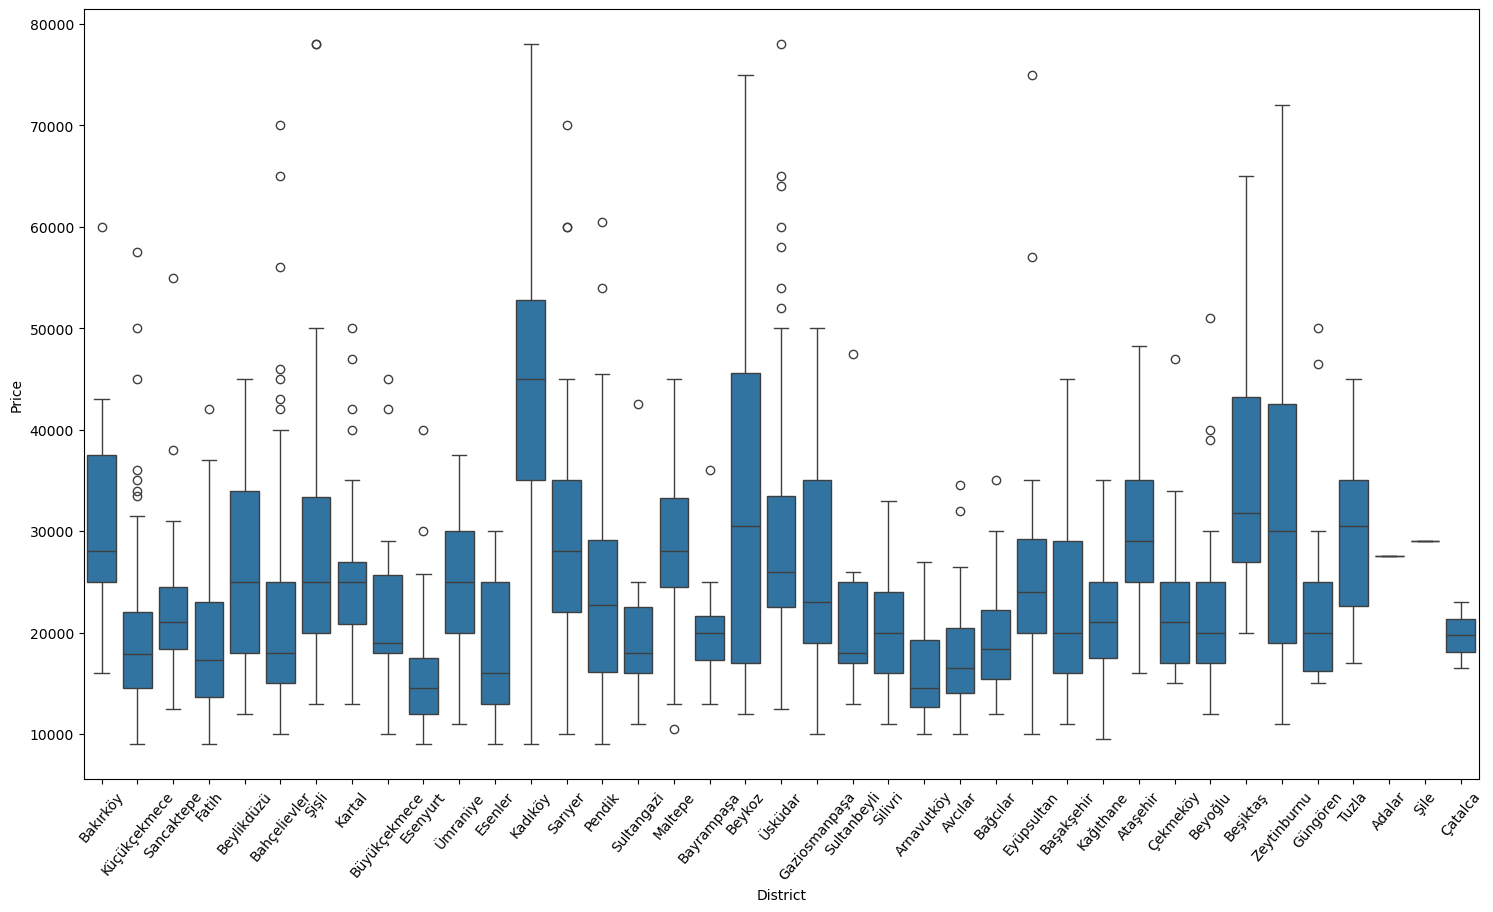

In [2200]:
plt.figure(figsize=(18, 10))
sns.boxplot(x='District', y='Price', data=df)
plt.xticks(rotation=50);

In [2201]:
def corr_sort(data, column):
    return abs(data.corr(numeric_only=True)[column]).sort_values(ascending=False)

corr_sort(df, 'Price')  

Price                        1.000000
Average Price                0.757715
Gross Square Meters          0.436394
Number of Rooms              0.370113
Net Square Meters            0.357793
Number of Bathrooms          0.353728
SpaceDifference              0.291864
Number of Building Floors    0.222280
Building Age                 0.180485
Floor                        0.061114
Days Since Listing           0.026051
Deposit                      0.018607
Name: Price, dtype: float64

## Modelling with Machine Learning

In [2202]:
x = df.drop(columns=['Price'], axis=1)
y = df['Price']

In [2203]:
x = pd.get_dummies(x, drop_first=True)

In [2204]:
normalized_x = normalize(x)

In [2205]:
scaled_x = scale(x)

In [2206]:
x.isnull().sum()

Average Price                        0
Net Square Meters                    0
Number of Rooms                      0
Floor                                0
Deposit                              0
Number of Bathrooms                  0
Gross Square Meters                  0
Building Age                         0
Number of Building Floors            0
Days Since Listing                   0
SpaceDifference                      0
District_Arnavutköy                  0
District_Ataşehir                    0
District_Avcılar                     0
District_Bahçelievler                0
District_Bakırköy                    0
District_Bayrampaşa                  0
District_Bağcılar                    0
District_Başakşehir                  0
District_Beykoz                      0
District_Beylikdüzü                  0
District_Beyoğlu                     0
District_Beşiktaş                    0
District_Büyükçekmece                0
District_Esenler                     0
District_Esenyurt        

In [2207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [2208]:
algo_test(normalized_x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.747668,5891.670516,3920.275893
Gradient Boosting,0.726788,6130.593188,4065.753358
KNeighborsRegressor,0.574447,7651.199478,6075.769835
Decision Tree,0.515154,8166.850505,5255.996454
Extra Tree,0.494860,8336.017214,5318.290780
Lasso,0.411606,8996.766872,5832.480740
AdaBoost,0.408689,9019.046416,6386.970922
Linear,0.341433,9518.148165,6074.220886
Ridge,0.030135,11550.697324,8351.146408
SGD,0.007310,11685.824641,8449.664640


In [2209]:
algo_test(scaled_x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,7.302536e-01,6.091586e+03,4.082381e+03
XGBRegressor,7.213883e-01,6.190877e+03,4.029778e+03
ElasticNet,6.346060e-01,7.089787e+03,4.784938e+03
SGD,6.301055e-01,7.133316e+03,4.715649e+03
Lasso,6.240658e-01,7.191318e+03,4.676065e+03
Ridge,6.238161e-01,7.193705e+03,4.677743e+03
KNeighborsRegressor,5.828859e-01,7.574953e+03,5.949098e+03
Decision Tree,4.128991e-01,8.986879e+03,5.693720e+03
Extra Tree,4.099979e-01,9.009057e+03,5.783585e+03
AdaBoost,3.938178e-01,9.131752e+03,5.856306e+03


## Modelling with Deep Learning

In [2210]:
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=42)


In [2211]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2212]:
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [2271]:
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1500, batch_size=128)

In [2214]:
pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [2215]:
r2_score(y_test, pred)

0.6329643467064998

## Feature Importance

In [2219]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [2235]:
predict = lr.predict(x_test)

In [2236]:
x_train_df = pd.DataFrame(x_train, columns=x.columns)

In [2237]:
feature_importance = pd.DataFrame({'feature': x_train_df.columns, 'Coefs': lr.coef_})
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

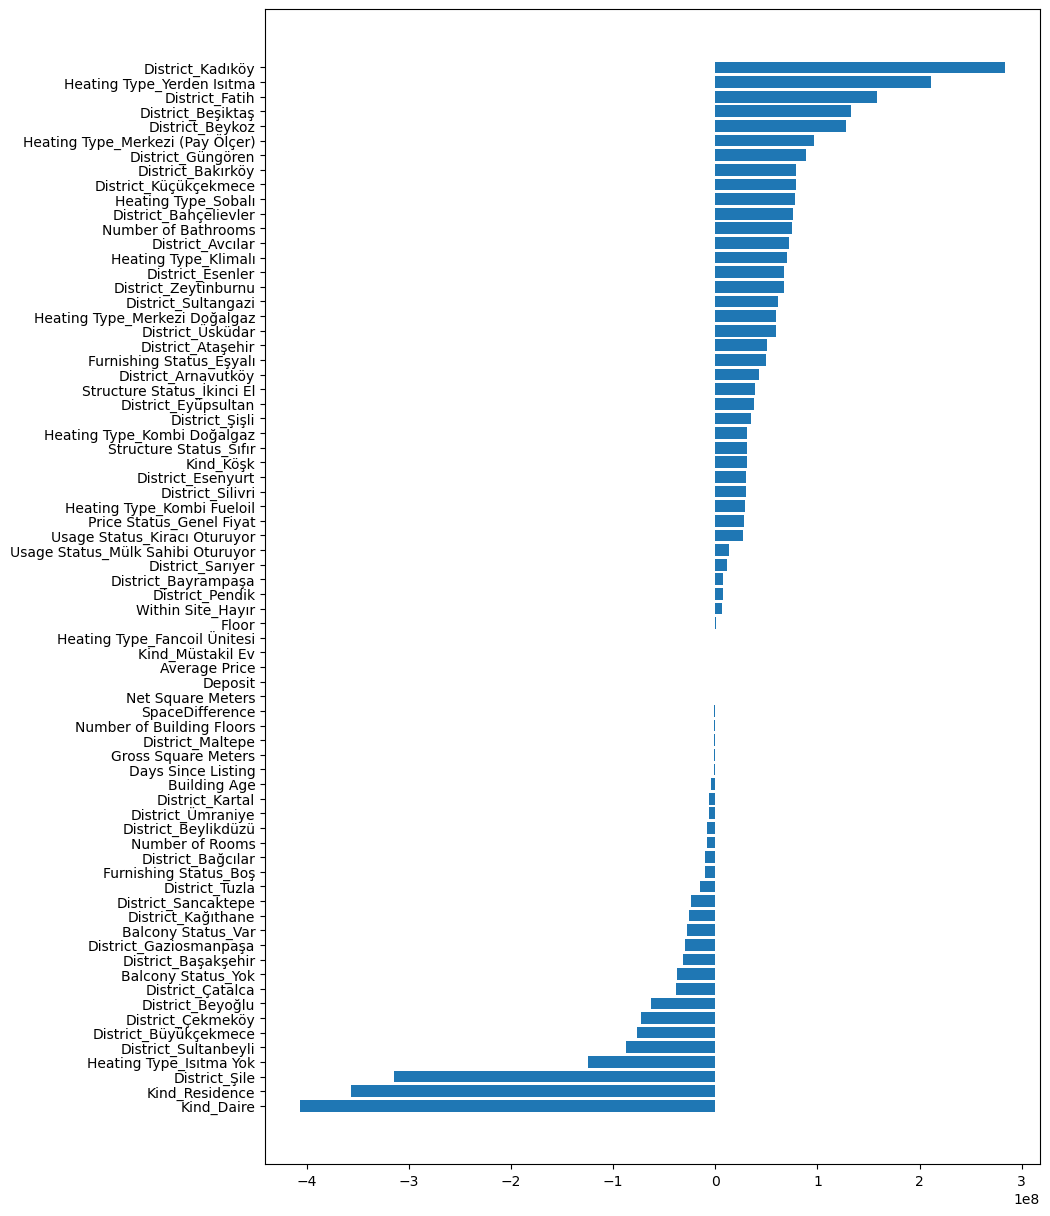

In [2238]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.barh(feature_importance.feature, feature_importance.Coefs)
plt.gca().invert_yaxis()
plt.show()

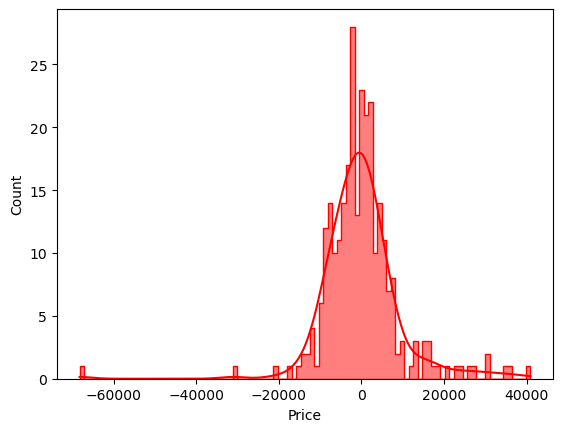

In [2239]:
residuals =y_test - predict
sns.histplot(residuals, kde=True, bins=100, color='red', alpha=0.5, label='Residuals', element='step');

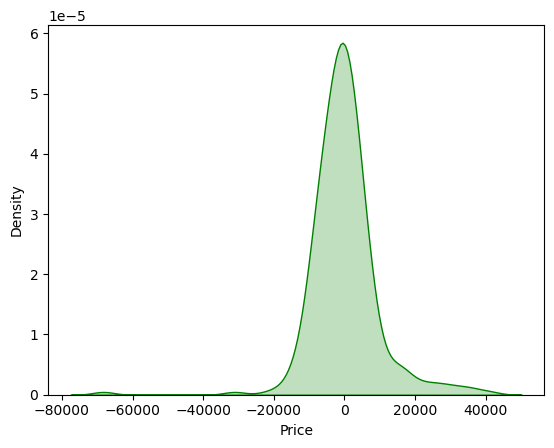

In [2240]:
sns.kdeplot(residuals, color='green', fill=True);

## Results

A model has been created using data extracted from the EmlakJet website to predict house prices. This model employs both Machine Learning and Deep Learning algorithms. The accuracy achieved with the Machine Learning algorithm is around 74%, while the Deep Learning algorithm achieves an accuracy of approximately 64%.

To improve the model's accuracy, several steps can be taken: more data can be collected, data cleaning and feature engineering can be performed. Additionally, the hyperparameters of the algorithms used can be fine-tuned to enhance performance.